**Introduction :**
    

In [89]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib
from scipy.stats import norm
from scipy import stats

import matplotlib.pyplot as plt
%matplotlib inline


In [90]:
train_df=pd.read_csv('/Users/esragul/Desktop/spring19/EC 48W/project/project data/train.csv')
test_df=pd.read_csv('/Users/esragul/Desktop/spring19/EC 48W/project/project data/test.csv')
print(train_df.shape)
print(test_df.shape)

(1460, 81)
(1459, 80)


In [92]:
numericVariables = train_df.select_dtypes(include=[np.number]).columns.tolist()
print(len(numericVariables))
train_df.shape

38


(1460, 81)

In [93]:
train_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [94]:
train_df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

           ...         WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count      ...        1460.000000  1460.000000    1460.000000  1460.000000   
mean       ...          94.244521    46.660274      21.954110     3.409589   
std        ...         125.338794    66.256028      61.119149    29.317331   
min        ...           0.000000     0.000000       0.000000     0.000000   
25%        ...           0.000000     0.000000       0.000000     0.000000   
50%        ...           0.000000    25.000000       0.000000     0.000000   
75%        ...         168.000000    68.000000       0.000000     0.000000   
max        ...         857.000000   547.000000     552.000000   508.000000   

       ScreenPorch     PoolArea       MiscVal       MoSold       YrSold  \
count  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000   
mean     15.060959     2.758904     43.489041     6.321918  2007.815753   
std      55.757415    40.177307    496.123024     2.703626     1.328095   
min       0.000000     0.000000      0.000000     1.000000  2006.000000   
25%       0.000000     0.000000      0.000000     5.000000  2007.000000   
50%       0.000000     0.000000      0.000000     6.000000  2008.000000   
75%       0.000000     0.000000      0.000000     8.000000  2009.000000   
max     480.000000   738.000000  15500.000000    12.000000  2010.000000   

           SalePrice  
count    1460.000000  
mean   180921.195890  
std     79442.502883  
min     34900.000000  
25%    129975.000000  
50%    163000.000000  
75%    214000.000000  
max    755000.000000  

[8 rows x 38 columns]

In [95]:
missing_data=pd.DataFrame(train_df.isnull().sum().reset_index())

missing_data.columns=["index","missingcount"]
missing_data=missing_data[missing_data["missingcount"]>0]
missing_data['missingper']=(missing_data['missingcount']/train_df.shape[0])*100
missing_data

index  missingcount  missingper
3    LotFrontage           259   17.739726
6          Alley          1369   93.767123
25    MasVnrType             8    0.547945
26    MasVnrArea             8    0.547945
30      BsmtQual            37    2.534247
31      BsmtCond            37    2.534247
32  BsmtExposure            38    2.602740
33  BsmtFinType1            37    2.534247
35  BsmtFinType2            38    2.602740
42    Electrical             1    0.068493
57   FireplaceQu           690   47.260274
58    GarageType            81    5.547945
59   GarageYrBlt            81    5.547945
60  GarageFinish            81    5.547945
63    GarageQual            81    5.547945
64    GarageCond            81    5.547945
72        PoolQC          1453   99.520548
73         Fence          1179   80.753425
74   MiscFeature          1406   96.301370

In [96]:
train_df.drop(['MiscFeature','PoolQC','Fence','FireplaceQu','Alley','LotFrontage'],axis=1,inplace=True)
print(train_df.shape)

(1460, 75)


In [97]:
cor=train_df.corr()
cor['SalePrice'].sort_values(ascending=False)[0:20]


SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
HalfBath        0.284108
LotArea         0.263843
Name: SalePrice, dtype: float64

In [98]:
list_cor=list(cor['SalePrice'].sort_values(ascending=False)[0:20].index)
final_df=train_df[list_cor]
final_df.shape

(1460, 20)

In [99]:
final_df[list_cor].isnull().sum()

SalePrice        0
OverallQual      0
GrLivArea        0
GarageCars       0
GarageArea       0
TotalBsmtSF      0
1stFlrSF         0
FullBath         0
TotRmsAbvGrd     0
YearBuilt        0
YearRemodAdd     0
GarageYrBlt     81
MasVnrArea       8
Fireplaces       0
BsmtFinSF1       0
WoodDeckSF       0
2ndFlrSF         0
OpenPorchSF      0
HalfBath         0
LotArea          0
dtype: int64

In [100]:
print(final_df['GarageYrBlt'].dtype)
print(final_df['MasVnrArea'].dtype)

float64
float64


In [101]:
final_df['GarageYrBlt']=final_df['GarageYrBlt'].fillna(final_df['GarageYrBlt'].mode()[0])
final_df['MasVnrArea']=final_df['MasVnrArea'].fillna(final_df['MasVnrArea'].mode()[0])
final_df[list_cor].isnull().sum()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


SalePrice       0
OverallQual     0
GrLivArea       0
GarageCars      0
GarageArea      0
TotalBsmtSF     0
1stFlrSF        0
FullBath        0
TotRmsAbvGrd    0
YearBuilt       0
YearRemodAdd    0
GarageYrBlt     0
MasVnrArea      0
Fireplaces      0
BsmtFinSF1      0
WoodDeckSF      0
2ndFlrSF        0
OpenPorchSF     0
HalfBath        0
LotArea         0
dtype: int64

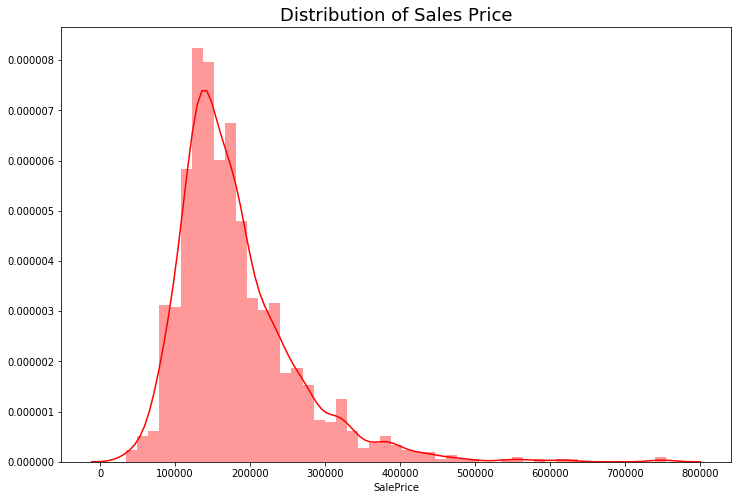

In [102]:
plt.figure(figsize=(12,8))
sns.distplot(final_df['SalePrice'], color='r')
plt.title('Distribution of Sales Price', fontsize=18)

plt.show()

In [103]:
print(final_df['SalePrice'].skew())
print(final_df['SalePrice'].kurt())

1.88287575977
6.53628186006


In [104]:
final_df['SalePrice']=np.log(final_df.loc[:,'SalePrice'])
print(final_df['SalePrice'].skew())

0.121335062205


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


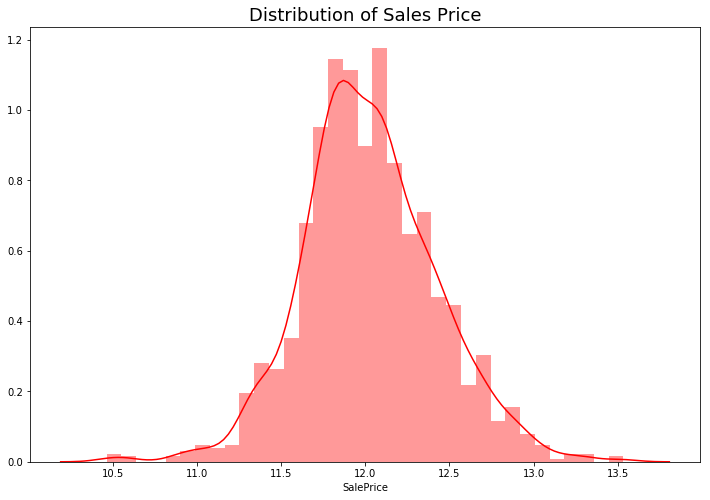

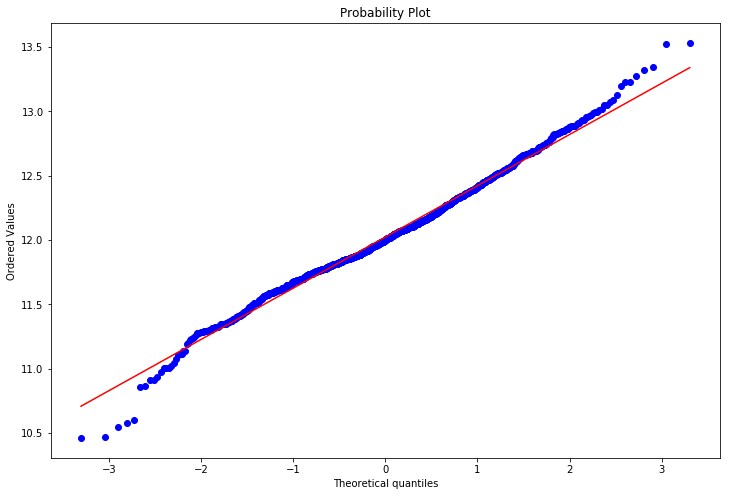

In [105]:
plt.figure(figsize=(12,8))
sns.distplot(final_df['SalePrice'], color='r')
plt.title('Distribution of Sales Price', fontsize=18)
plt.show()

fig = plt.figure(figsize=(12,8))
res = stats.probplot(final_df['SalePrice'], plot=plt)
plt.show()

Text(0.5,1,'Heat map')

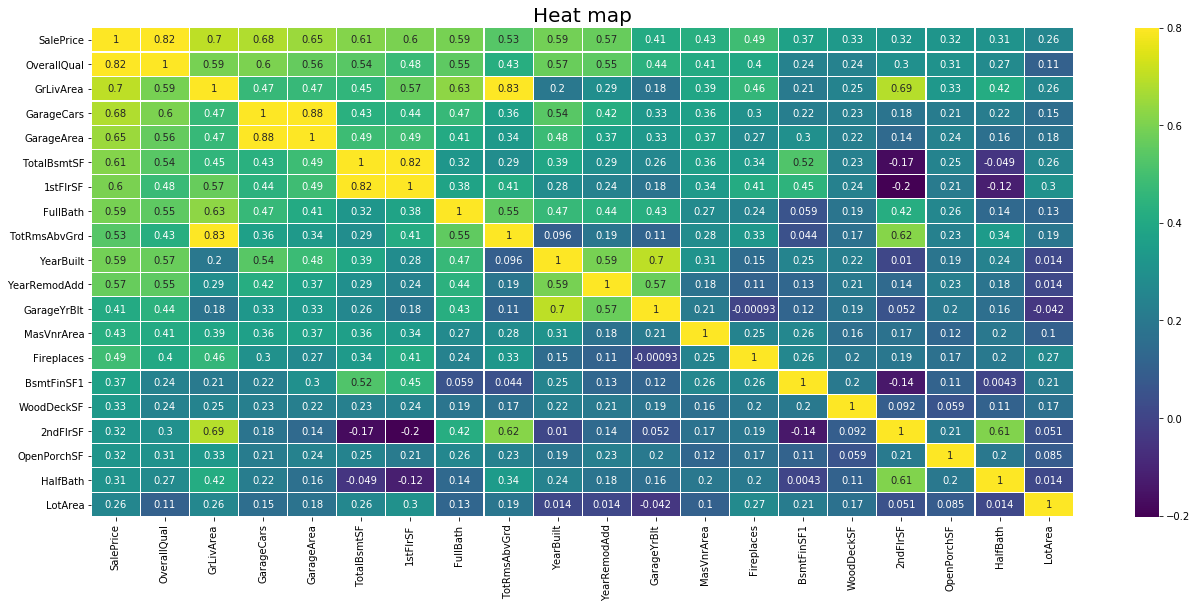

In [106]:
corrmat = final_df.corr()
f, ax = plt.subplots(figsize=(22, 9))
sns.heatmap(corrmat, vmax=.8, square=False,annot=True, cmap="viridis", linewidths=0.2,annot_kws={'size':10})
plt.title("Heat map",fontsize=20)


In [107]:
final_df=final_df.drop(["GarageArea","TotRmsAbvGrd","2ndFlrSF","1stFlrSF","GarageYrBlt"],axis=1)
final_df.shape

(1460, 15)

Text(0.5,1,'Heat map')

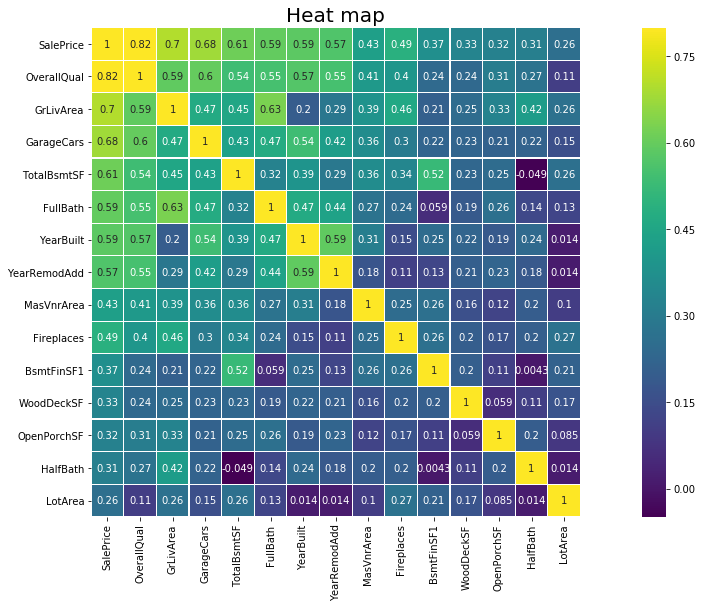

In [108]:
corrmat = final_df.corr()
f, ax = plt.subplots(figsize=(22, 9))
sns.heatmap(corrmat, vmax=.8, square=True,annot=True,cmap='viridis',linewidths=0.2,annot_kws={'size':10})
plt.title("Heat map",fontsize=20)


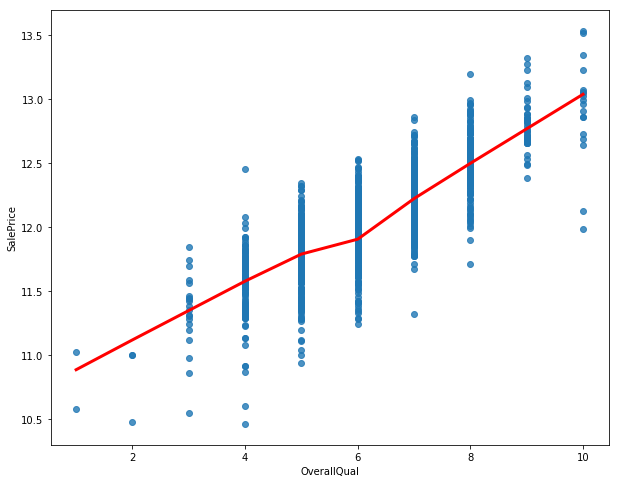

In [109]:
plt.figure(figsize=(10,8))
sns.regplot('OverallQual', 'SalePrice', lowess=True,
            line_kws={"color":"red", "linewidth":3}, data= final_df)

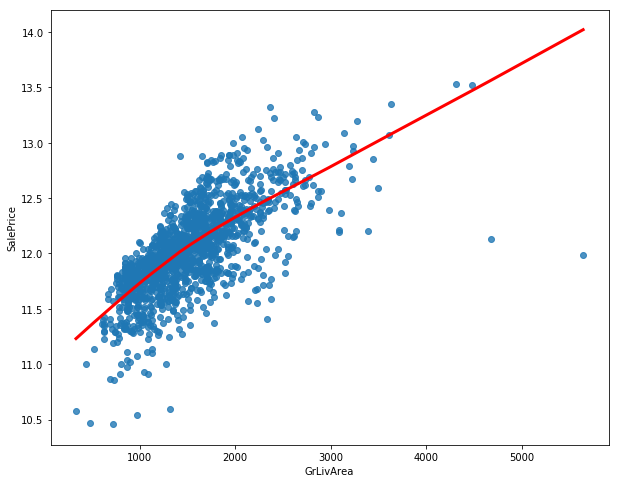

In [110]:
plt.figure(figsize=(10,8))
sns.regplot('GrLivArea', 'SalePrice', lowess=True,
            line_kws={"color":"red", "linewidth":3}, data= final_df)

Text(0.5,1,'GarageCars vs SalePice')

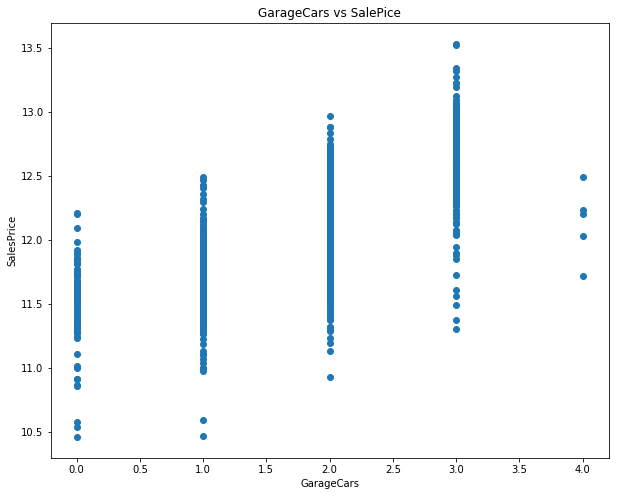

In [111]:
plt.figure(figsize=(10,8))
plt.scatter(x='GarageCars',y='SalePrice',data =final_df)
plt.ylabel("SalesPrice")
plt.xlabel("GarageCars")
plt.title("GarageCars vs SalePice")

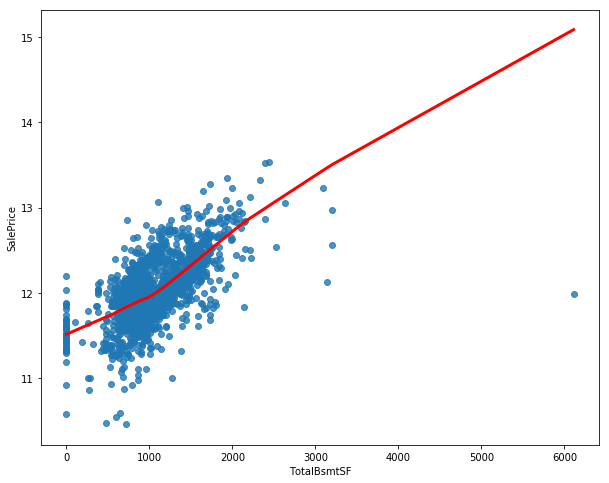

In [112]:
plt.figure(figsize=(10,8))
sns.regplot('TotalBsmtSF', 'SalePrice', lowess=True,
            line_kws={"color":"red", "linewidth":3}, data= final_df)

Text(0.5,1,'FullBath vs SalePice')

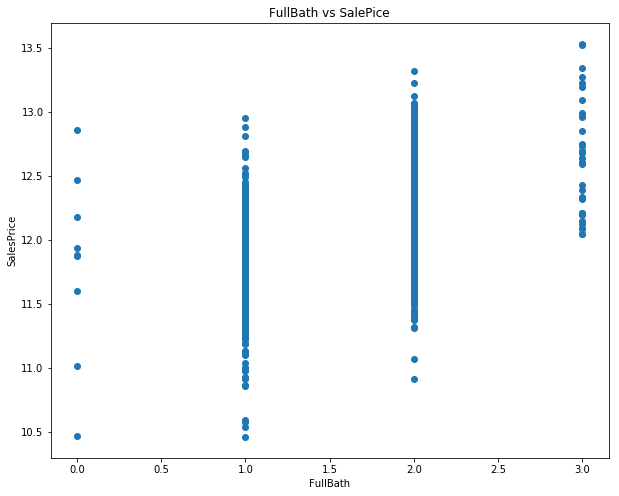

In [113]:
plt.figure(figsize=(10,8))
plt.scatter(x='FullBath',y='SalePrice',data =final_df)
plt.ylabel("SalesPrice")
plt.xlabel("FullBath")
plt.title("FullBath vs SalePice")

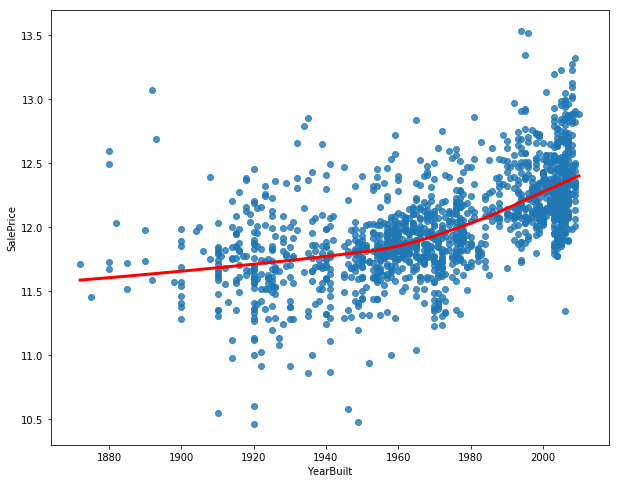

In [114]:
plt.figure(figsize=(10,8))
sns.regplot('YearBuilt', 'SalePrice', lowess=True,
            line_kws={"color":"red", "linewidth":3}, data= final_df)

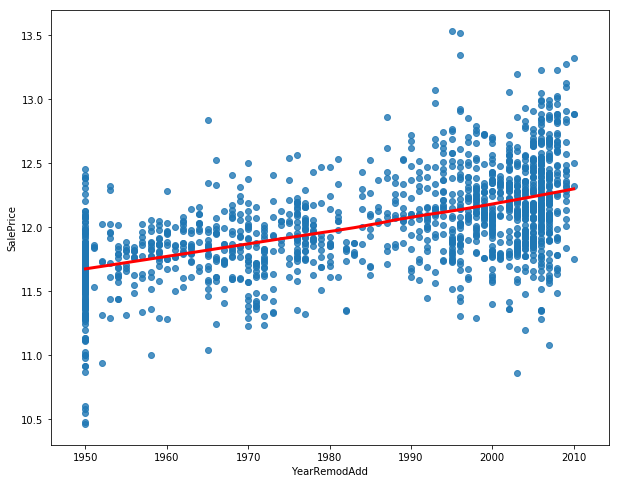

In [115]:
plt.figure(figsize=(10,8))
sns.regplot('YearRemodAdd', 'SalePrice', lowess=True,
            line_kws={"color":"red", "linewidth":3}, data= final_df)

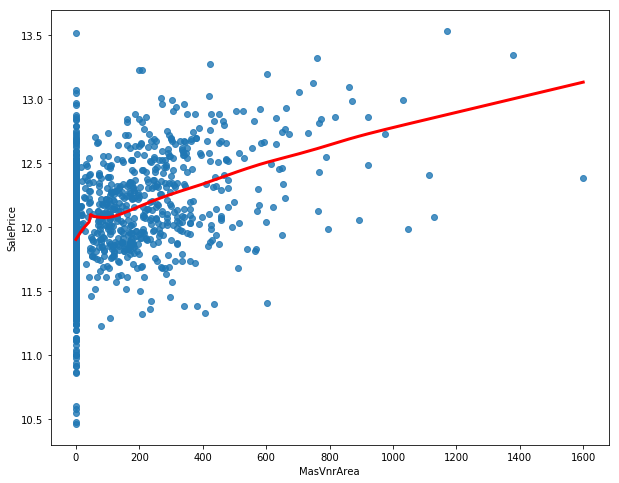

In [116]:
plt.figure(figsize=(10,8))
sns.regplot('MasVnrArea', 'SalePrice', lowess=True,
            line_kws={"color":"red", "linewidth":3}, data= final_df)

/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:4016: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in greater_equal
  res = _lowess(y, x, frac=frac, it=it, delta=delta)


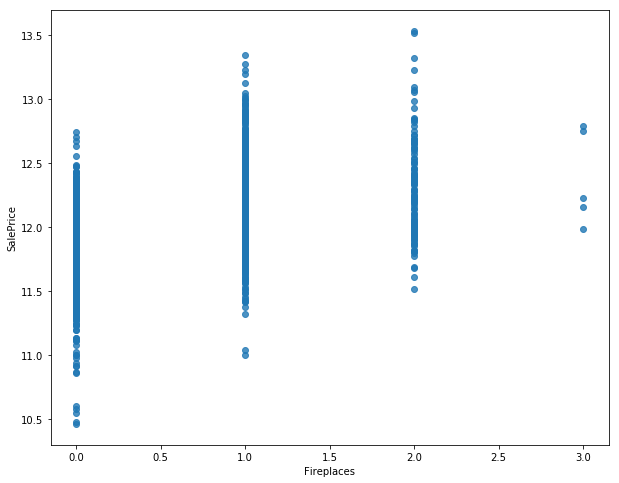

In [117]:
plt.figure(figsize=(10,8))
sns.regplot('Fireplaces', 'SalePrice', lowess=True,
            line_kws={"color":"red", "linewidth":3}, data= final_df)

**Modelling**

In [118]:
finaltest_df=final_df["SalePrice"]
finaltrain_df=final_df.drop("SalePrice",axis=1)
print(finaltrain_df.shape)
print(finaltest_df.shape)

(1460, 14)
(1460,)


In [119]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


In [120]:
x_train,x_test,y_train,y_test=train_test_split(finaltrain_df,finaltest_df,test_size=0.3, random_state=42)

lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred_train=lr.predict(x_train)
y_pred=lr.predict(x_test)

In [121]:
print("training score: " + str(r2_score(y_train,y_pred_train)))
print("test score: " + str(r2_score(y_test,y_pred)))

training score: 0.83102063252
test score: 0.850634733057


In [122]:
from sklearn.metrics import mean_absolute_error
print("Training Mean Absolute Error : " + str(mean_absolute_error(y_pred_train, y_train)))
print("Test Mean Absolute Error : " + str(mean_absolute_error(y_pred, y_test)))

errors = abs(y_pred_train - y_train)
mapex = 100 * np.mean(errors)
accuracy_lr_train = 100 - mapex
print("Training Accuracy: " + str(accuracy_lr_train))
errors = abs(y_pred - y_test)
mapex = 100 * np.mean(errors)
accuracy_lr = 100 - mapex
print("Test Accuracy: " + str(accuracy_lr))

Training Mean Absolute Error : 0.110152442574
Test Mean Absolute Error : 0.117366900531
Training Accuracy: 88.98475574260921
Test Accuracy: 88.26330994687615


In [123]:
import sys
print(sys.base_prefix)
!{sys.executable} -m pip install xgboost

/anaconda3
You are using pip version 9.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [124]:
from xgboost import XGBRegressor

my_model = XGBRegressor()
my_model.fit(x_train, y_train, verbose=False)

[23:15:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [125]:
predictions_train = my_model.predict(x_train)
predictions = my_model.predict(x_test)

print("Trainng Mean Absolute Error : " + str(mean_absolute_error(predictions_train, y_train))) 
print("Test Mean Absolute Error : " + str(mean_absolute_error(predictions, y_test))) 
print("Training score: " + str(r2_score(y_train,predictions_train)))
print("Test score: " + str(r2_score(y_test,predictions)))

errors = abs(predictions_train - y_train)
mapex = 100 * np.mean(errors)
accuracy_xg_train = 100 - mapex
print("Training Accuracy: " + str(accuracy_xg_train))
errors = abs(predictions - y_test)
mapex = 100 * np.mean(errors)
accuracy_xg = 100 - mapex
print("Test Accuracy: " + str(accuracy_xg))

Trainng Mean Absolute Error : 0.0706864368258
Test Mean Absolute Error : 0.100801747983
Training score: 0.936938568688
Test score: 0.878479371197
Training Accuracy: 92.93135631741734
Test Accuracy: 89.91982520172573


In [126]:
my_model = XGBRegressor(n_estimators=1000, learning_rate=0.01)
my_model.fit(x_train, y_train, early_stopping_rounds=5, 
             eval_set=[(x_test, y_test)], verbose=False)

[23:15:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.01, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [127]:
predictions_train = my_model.predict(x_train)
predictions = my_model.predict(x_test)

print("Training Mean Absolute Error : " + str(mean_absolute_error(predictions_train, y_train))) 
print("Test Mean Absolute Error : " + str(mean_absolute_error(predictions, y_test))) 
print("Training score: " + str(r2_score(y_train,predictions_train)))
print("Test score: " + str(r2_score(y_test,predictions)))

errors = abs(predictions_train - y_train)
mapex = 100 * np.mean(errors)
accuracy_xg_train = 100 - mapex
print("Training Accuracy: " + str(accuracy_xg_train))
errors = abs(predictions - y_test)
mapex = 100 * np.mean(errors)
accuracy_xg = 100 - mapex
print("Test Accuracy: " + str(accuracy_xg))

Training Mean Absolute Error : 0.0734671971997
Test Mean Absolute Error : 0.100637486957
Training score: 0.932823237012
Test score: 0.879912695125
Training Accuracy: 92.65328028002752
Test Accuracy: 89.93625130430021


In [128]:
# import sys
# print(sys.base_prefix)
# !{sys.executable} -m pip install graphviz

In [129]:
# import sys
# print(sys.base_prefix)
# !{sys.executable} -m pip install pydot

In [130]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


In [131]:
regressor = RandomForestRegressor(n_estimators=20, random_state=42)  
#regressor = RandomForestRegressor(n_estimators=20, max_depth = 7, min_samples_split=0.1, min_samples_leaf=0.1,max_features=6, random_state= 42)
regressor.fit(x_train, y_train)  
y_pred = regressor.predict(x_test)
y_pred2 = regressor.predict(x_train)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  
score = r2_score(y_test,y_pred)
score2 = r2_score(y_train,y_pred2)
print("score: " + str(score))
print("score2: " + str(score2))

Mean Absolute Error: 0.101592549256
Mean Squared Error: 0.0211772255598
Root Mean Squared Error: 0.145523969022
score: 0.875168262362
score2: 0.975583378548


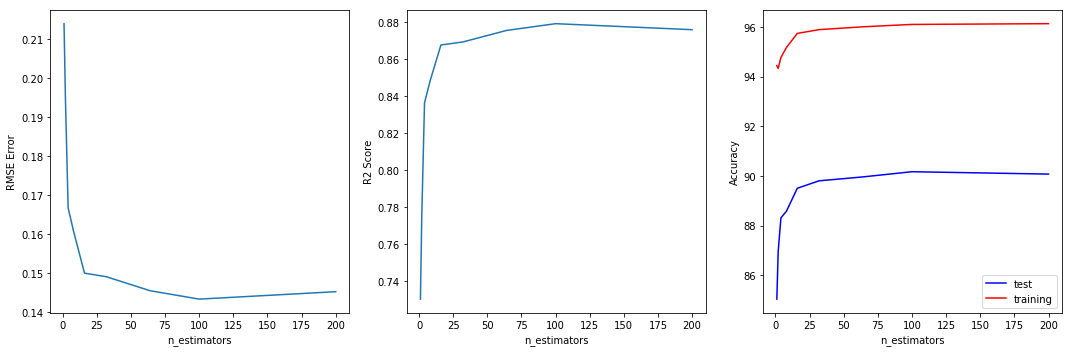

In [132]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]

rmse = []
scores = []
accuracies = []
accuracies_train = []
for estimator in n_estimators:
    rf = RandomForestRegressor(n_estimators=estimator)
    rf.fit(x_train, y_train)
    y_pred_train = rf.predict(x_train)
    y_pred = rf.predict(x_test)
    rmserror = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    scoree = r2_score(y_test,y_pred)
    errors_train = abs(y_pred_train - y_train)
    mape_train = 100 * np.mean(errors_train)
    accuracy_train = 100 - mape_train
    accuracies_train.append(accuracy_train)
    errors = abs(y_pred - y_test)
    mape = 100 * np.mean(errors)
    accuracy = 100 - mape
    accuracies.append(accuracy)
    scores.append(scoree)
    rmse.append(rmserror)
    
plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
plt.plot(n_estimators, rmse)
plt.ylabel("RMSE Error")
plt.xlabel("n_estimators")
plt.subplot(1,3,2)
plt.plot(n_estimators, scores)
plt.ylabel("R2 Score")
plt.xlabel("n_estimators")
plt.subplot(1,3,3)
plt.plot(n_estimators, accuracies, 'b', label='test')
plt.plot(n_estimators, accuracies_train, 'r', label='training')
plt.legend()
plt.ylabel("Accuracy")
plt.xlabel("n_estimators")

plt.tight_layout()
plt.show()


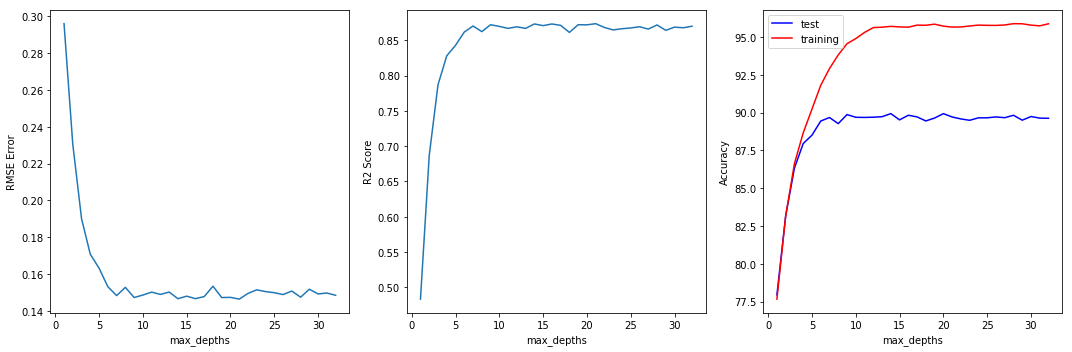

In [133]:
max_depths = np.linspace(1, 32, 32, endpoint=True)

rmse = []
scores = []
accuracies = []
accuracies_train = []
for max_depth in max_depths:
    rf = RandomForestRegressor(n_estimators=20, max_depth = max_depth)
    rf.fit(x_train, y_train)
    y_pred_train = rf.predict(x_train)
    y_pred = rf.predict(x_test)
    rmserror = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    scoree = r2_score(y_test,y_pred)
    errors_train = abs(y_pred_train - y_train)
    mape_train = 100 * np.mean(errors_train)
    accuracy_train = 100 - mape_train
    accuracies_train.append(accuracy_train)
    errors = abs(y_pred - y_test)
    mape = 100 * np.mean(errors)
    accuracy = 100 - mape
    accuracies.append(accuracy)
    scores.append(scoree)
    rmse.append(rmserror)
    
plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
plt.plot(max_depths, rmse)
plt.ylabel("RMSE Error")
plt.xlabel("max_depths")
plt.subplot(1,3,2)
plt.plot(max_depths, scores)
plt.ylabel("R2 Score")
plt.xlabel("max_depths")
plt.subplot(1,3,3)
plt.plot(max_depths, accuracies, 'b', label='test')
plt.plot(max_depths, accuracies_train, 'r', label='training')
plt.legend()
plt.ylabel("Accuracy")
plt.xlabel("max_depths")

plt.tight_layout()
plt.show()



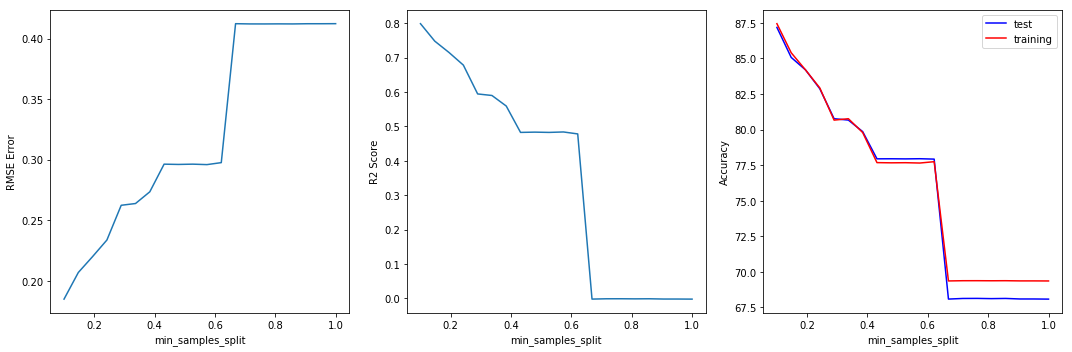

In [134]:
min_samples_splits = np.linspace(0.1, 1.0, 20, endpoint=True)

rmse = []
scores = []
accuracies = []
accuracies_train = []
for min_samples_split in min_samples_splits:
    rf = RandomForestRegressor(n_estimators=20, max_depth = 7, min_samples_split=min_samples_split)
    rf.fit(x_train, y_train)
    y_pred_train = rf.predict(x_train)
    y_pred = rf.predict(x_test)
    rmserror = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    scoree = r2_score(y_test,y_pred)
    errors_train = abs(y_pred_train - y_train)
    mape_train = 100 * np.mean(errors_train)
    accuracy_train = 100 - mape_train
    accuracies_train.append(accuracy_train)
    errors = abs(y_pred - y_test)
    mape = 100 * np.mean(errors)
    accuracy = 100 - mape
    accuracies.append(accuracy)
    scores.append(scoree)
    rmse.append(rmserror)
    
plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
plt.plot(min_samples_splits, rmse)
plt.ylabel("RMSE Error")
plt.xlabel("min_samples_split")
plt.subplot(1,3,2)
plt.plot(min_samples_splits, scores)
plt.ylabel("R2 Score")
plt.xlabel("min_samples_split")
plt.subplot(1,3,3)
plt.plot(min_samples_splits, accuracies, 'b', label='test')
plt.plot(min_samples_splits, accuracies_train, 'r', label='training')
plt.legend()
plt.ylabel("Accuracy")
plt.xlabel("min_samples_split")

plt.tight_layout()
plt.show()



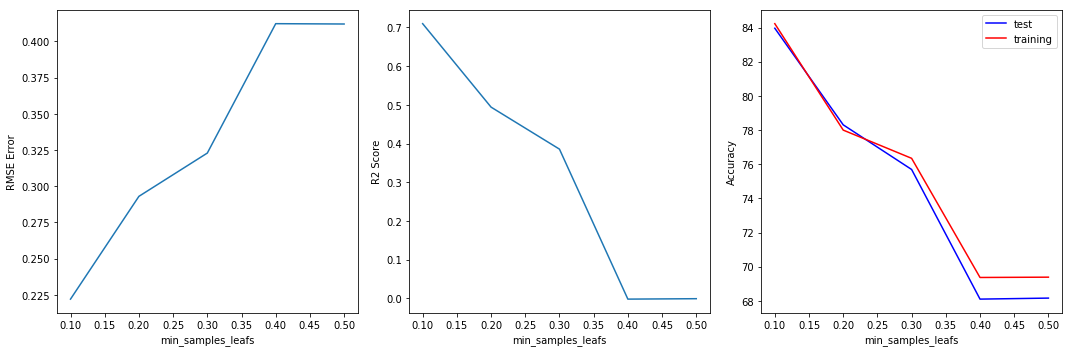

In [135]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)

rmse = []
scores = []
accuracies = []
accuracies_train = []
for min_samples_leaf in min_samples_leafs:
    rf = RandomForestRegressor(n_estimators=20, max_depth = 7, min_samples_split=0.1, min_samples_leaf=min_samples_leaf)
    rf.fit(x_train, y_train)
    y_pred_train = rf.predict(x_train)
    y_pred = rf.predict(x_test)
    rmserror = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    scoree = r2_score(y_test,y_pred)
    errors_train = abs(y_pred_train - y_train)
    mape_train = 100 * np.mean(errors_train)
    accuracy_train = 100 - mape_train
    accuracies_train.append(accuracy_train)
    errors = abs(y_pred - y_test)
    mape = 100 * np.mean(errors)
    accuracy = 100 - mape
    accuracies.append(accuracy)
    scores.append(scoree)
    rmse.append(rmserror)
    
plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
plt.plot(min_samples_leafs, rmse)
plt.ylabel("RMSE Error")
plt.xlabel("min_samples_leafs")
plt.subplot(1,3,2)
plt.plot(min_samples_leafs, scores)
plt.ylabel("R2 Score")
plt.xlabel("min_samples_leafs")
plt.subplot(1,3,3)
plt.plot(min_samples_leafs, accuracies, 'b', label='test')
plt.plot(min_samples_leafs, accuracies_train, 'r', label='training')
plt.legend()
plt.ylabel("Accuracy")
plt.xlabel("min_samples_leafs")

plt.tight_layout()
plt.show()



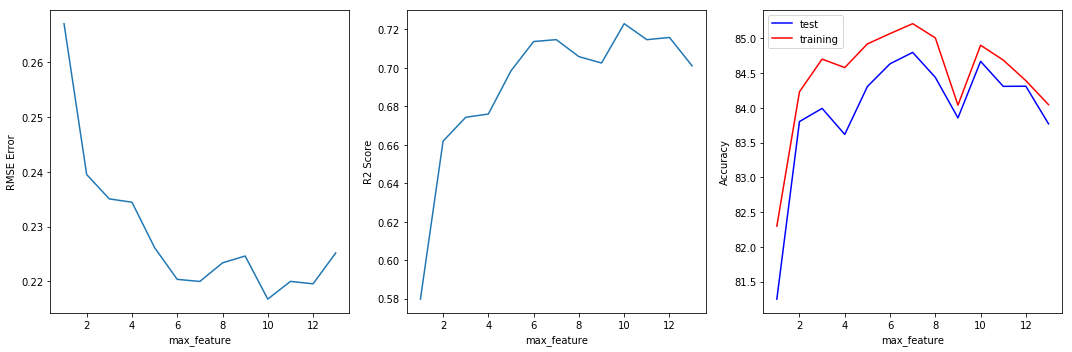

In [136]:
max_features = list(range(1,x_train.shape[1]))

rmse = []
scores = []
accuracies = []
accuracies_train = []
for max_feature in max_features:
    rf = RandomForestRegressor(n_estimators=20, max_depth = 7, min_samples_split=0.1, min_samples_leaf=0.1,max_features=max_feature)
    rf.fit(x_train, y_train)
    y_pred_train = rf.predict(x_train)
    y_pred = rf.predict(x_test)
    rmserror = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    scoree = r2_score(y_test,y_pred)
    errors_train = abs(y_pred_train - y_train)
    mape_train = 100 * np.mean(errors_train)
    accuracy_train = 100 - mape_train
    accuracies_train.append(accuracy_train)
    errors = abs(y_pred - y_test)
    mape = 100 * np.mean(errors)
    accuracy = 100 - mape
    accuracies.append(accuracy)
    scores.append(scoree)
    rmse.append(rmserror)
    
plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
plt.plot(max_features, rmse)
plt.ylabel("RMSE Error")
plt.xlabel("max_feature")
plt.subplot(1,3,2)
plt.plot(max_features, scores)
plt.ylabel("R2 Score")
plt.xlabel("max_feature")
plt.subplot(1,3,3)
plt.plot(max_features, accuracies, 'b', label='test')
plt.plot(max_features, accuracies_train, 'r', label='training')
plt.legend()
plt.ylabel("Accuracy")
plt.xlabel("max_feature")

plt.tight_layout()
plt.show()



In [137]:
#rf = RandomForestRegressor(n_estimators=20, random_state=42) 
rf = RandomForestRegressor(n_estimators=20, max_depth = 7, min_samples_split=0.1, min_samples_leaf=0.1,max_features=6, random_state= 42)
rf.fit(x_train, y_train)
y_pred_train = rf.predict(x_train)
y_pred = rf.predict(x_test)
rmserror = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
scoree = r2_score(y_test,y_pred)
errors_train = abs(y_pred_train - y_train)
mape_train = 100 * np.mean(errors_train)
accuracy_train = 100 - mape_train

errors = abs(y_pred - y_test)
mape = 100 * np.mean(errors)
accuracy = 100 - mape
print("RMSE: " + str(rmserror))
print("R2 Score: " + str(scoree))
print("Training Accuracy: " + str(accuracy_train))
print("Test Accuracy: " + str(accuracy))

RMSE: 0.220907850056
R2 Score: 0.712340811133
Training Accuracy: 84.73559495342732
Test Accuracy: 84.6237666141851


In [138]:
estimator = rf.estimators_[2]

from sklearn.tree import export_graphviz

export_graphviz(estimator, out_file='tree.dot', 
                feature_names = finaltrain_df.columns,
                class_names = finaltrain_df.columns,
                rounded = True, proportion = False, 
                precision = 2, filled = True)
